# Exploratroy Data Analysis of House Sales in King County, USA

#### Dataset Description

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 1910 and May 2015.

The dataset contains the following columns:

- `id`: Unique ID for each home sold
- `date`: Date of the home sale
- `price`: Price of each home sold
- `bedrooms`: Number of bedrooms
- `bathrooms`: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- `sqft_living`: Square footage of the apartment's interior living space
- `sqft_lot`: Square footage of the land space
- `floors`: Number of floors
- `waterfront`: A dummy variable for whether the apartment was overlooking the waterfront or not
- `view`: An index from 0 to 4 of how good the view of the property was
- `condition`: An index from 1 to 5 on the condition of the apartment
- `grade`: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- `sqft_above`: The square footage of the interior housing space that is above ground level
- `sqft_basement`: The square footage of the interior housing space that is below ground level
- `yr_built`: The year the house was initially built
- `yr_renovated`: The year of the house's last renovation
- `zipcode`: What zipcode area the house is in
- `lat`: Latitude
- `long`: Longitude
- `sqft_living15`: The square footage of interior housing living space for the nearest 15 neighbors
- `sqft_lot15`: The square footage of the land lots of the nearest 15 neighbors

Here is the official link to dataset [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)<br>
Can also be found in my [Github Repository](https://raw.githubusercontent.com/nagensk9/INDE577_ML/main/Dataset/Regression/kc_house_data.csv)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [38]:
pio.renderers.default = "notebook_connected+plotly_mimetype+iframe+colab+chrome"
# Set style and font size
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

In [3]:
# Dataset Url
url = "https://raw.githubusercontent.com/nagensk9/INDE577_ML/main/Dataset/Regression/kc_house_data.csv"

In [4]:
# Load the dataset
df = pd.read_csv(url)


In [5]:
# Number of rows and columns 
df.shape

(21613, 21)

 The dataframe has 21,613 rows (observations) and 20 columns (variables)

In [6]:
# First few rows of the dataframe
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [7]:
#Information about the dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
# Check for null values
print("Null values in the dataframe:\n", df.isnull().sum())

Null values in the dataframe:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Our data is pretty clean as it doesn't have any Null Values.

In [9]:
# Check data types of each column
print("\nData types in the dataframe:\n", df.dtypes)


Data types in the dataframe:
 id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


The data types of different columns are seem to be justified based on their description.

In [10]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

if duplicate_rows.shape[0] == 0:
    print("There are no duplicate rows in the dataframe.")
else:
    print("There are", duplicate_rows.shape[0], "duplicate rows in the dataframe.")

There are no duplicate rows in the dataframe.


In [11]:
# Drop ID and Date columns before data visaulization
df = df.drop(['id', 'date'], axis=1)

ID and Date won't contribute much into the analysis so we have dropped them.

In [12]:
# Get unique value counts for each column
df.nunique(axis=0)

price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [13]:
# Format the output of the describe method
summary = df.describe().T.style \
    .format("{:.2f}", subset=pd.IndexSlice[:, ['mean', 'std']]) \
    .bar(subset=['mean'], color='#ff6961') \
    .background_gradient(subset=['std'], cmap='PuBu', low=0, high=0.2) \
    .background_gradient(subset=['50%'], cmap='PuBu', low=0, high=0.2) \
    .set_caption("Summary Statistics of Housing Dataset") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [
            ('color', 'black'),
            ('font-size', '18px'),
            ('font-weight', 'bold')
        ]
    }, {
        'selector': 'th, td',
        'props': [
            ('font-size', '16px')
        ]
    }, {
        'selector': 'th',
        'props': [
            ('text-align', 'center'),
            ('background-color', '#f2f2f2')
        ]
    }])

# Display the formatted output
summary

Based on the summary statistics, some key findings that could help with data visualization are:

* The price variable has a very large range, from \$75,000 to $7,700,000. This suggests that a logarithmic transformation may be necessary to better visualize the distribution of house prices.
* The dataset contains houses with 0 to 33 bedrooms, but the majority of the houses have 3 bedrooms. Similarly, the dataset contains houses with 0 to 8 bathrooms, but the majority of the houses have 2.11 bathrooms.
* The living area variable has a large range, from 290 to 13,540 square feet. A histogram or density plot could be used to visualize the distribution of living area.
* The average lot area of houses in the dataset is 15,106.97 square feet, with a standard deviation of 41,420.51 square feet. The minimum lot area is 520 square feet, and the maximum lot area is 1,651,359 square feet.
* The majority of the houses in the dataset have 1.5 or 2 floors, with an average of 1.49 floors.
* There are very few houses in the dataset with a waterfront view (0.01%) or a high view score (0.23%). The majority of the houses have no waterfront view or view score.


## Exploratory Data Analysis

<img src="https://github.com/nagensk9/INDE577_ML/blob/main/Images/EDA.png?raw=true" >

Exploratory Data Analysis (EDA) is the process of examining and understanding the data to **discover patterns, relationships, and anomalies**. Following are our main objectives of performing EDA.

* Underlying **structure of the data**, the types of variables, and their distributions.

* **Detecting outliers and extreme values**, which can be errors or unusual data points that require special attention.

* **Identify Relationships between variables**, such as correlations or causal relationships.

* **Selecting relevant features** for a predictive model, by identifying the most important variables that are highly correlated with the outcome variable.

* **identifying missing data**, outliers, and other issues that need to be addressed before building a predictive model.

[Reference](https://www.researchgate.net/publication/329930775/figure/fig3/AS:873046667710469@1585161954284/The-fundamental-steps-of-the-exploratory-data-analysis-process.png)
    

In [14]:
df.shape

(21613, 19)

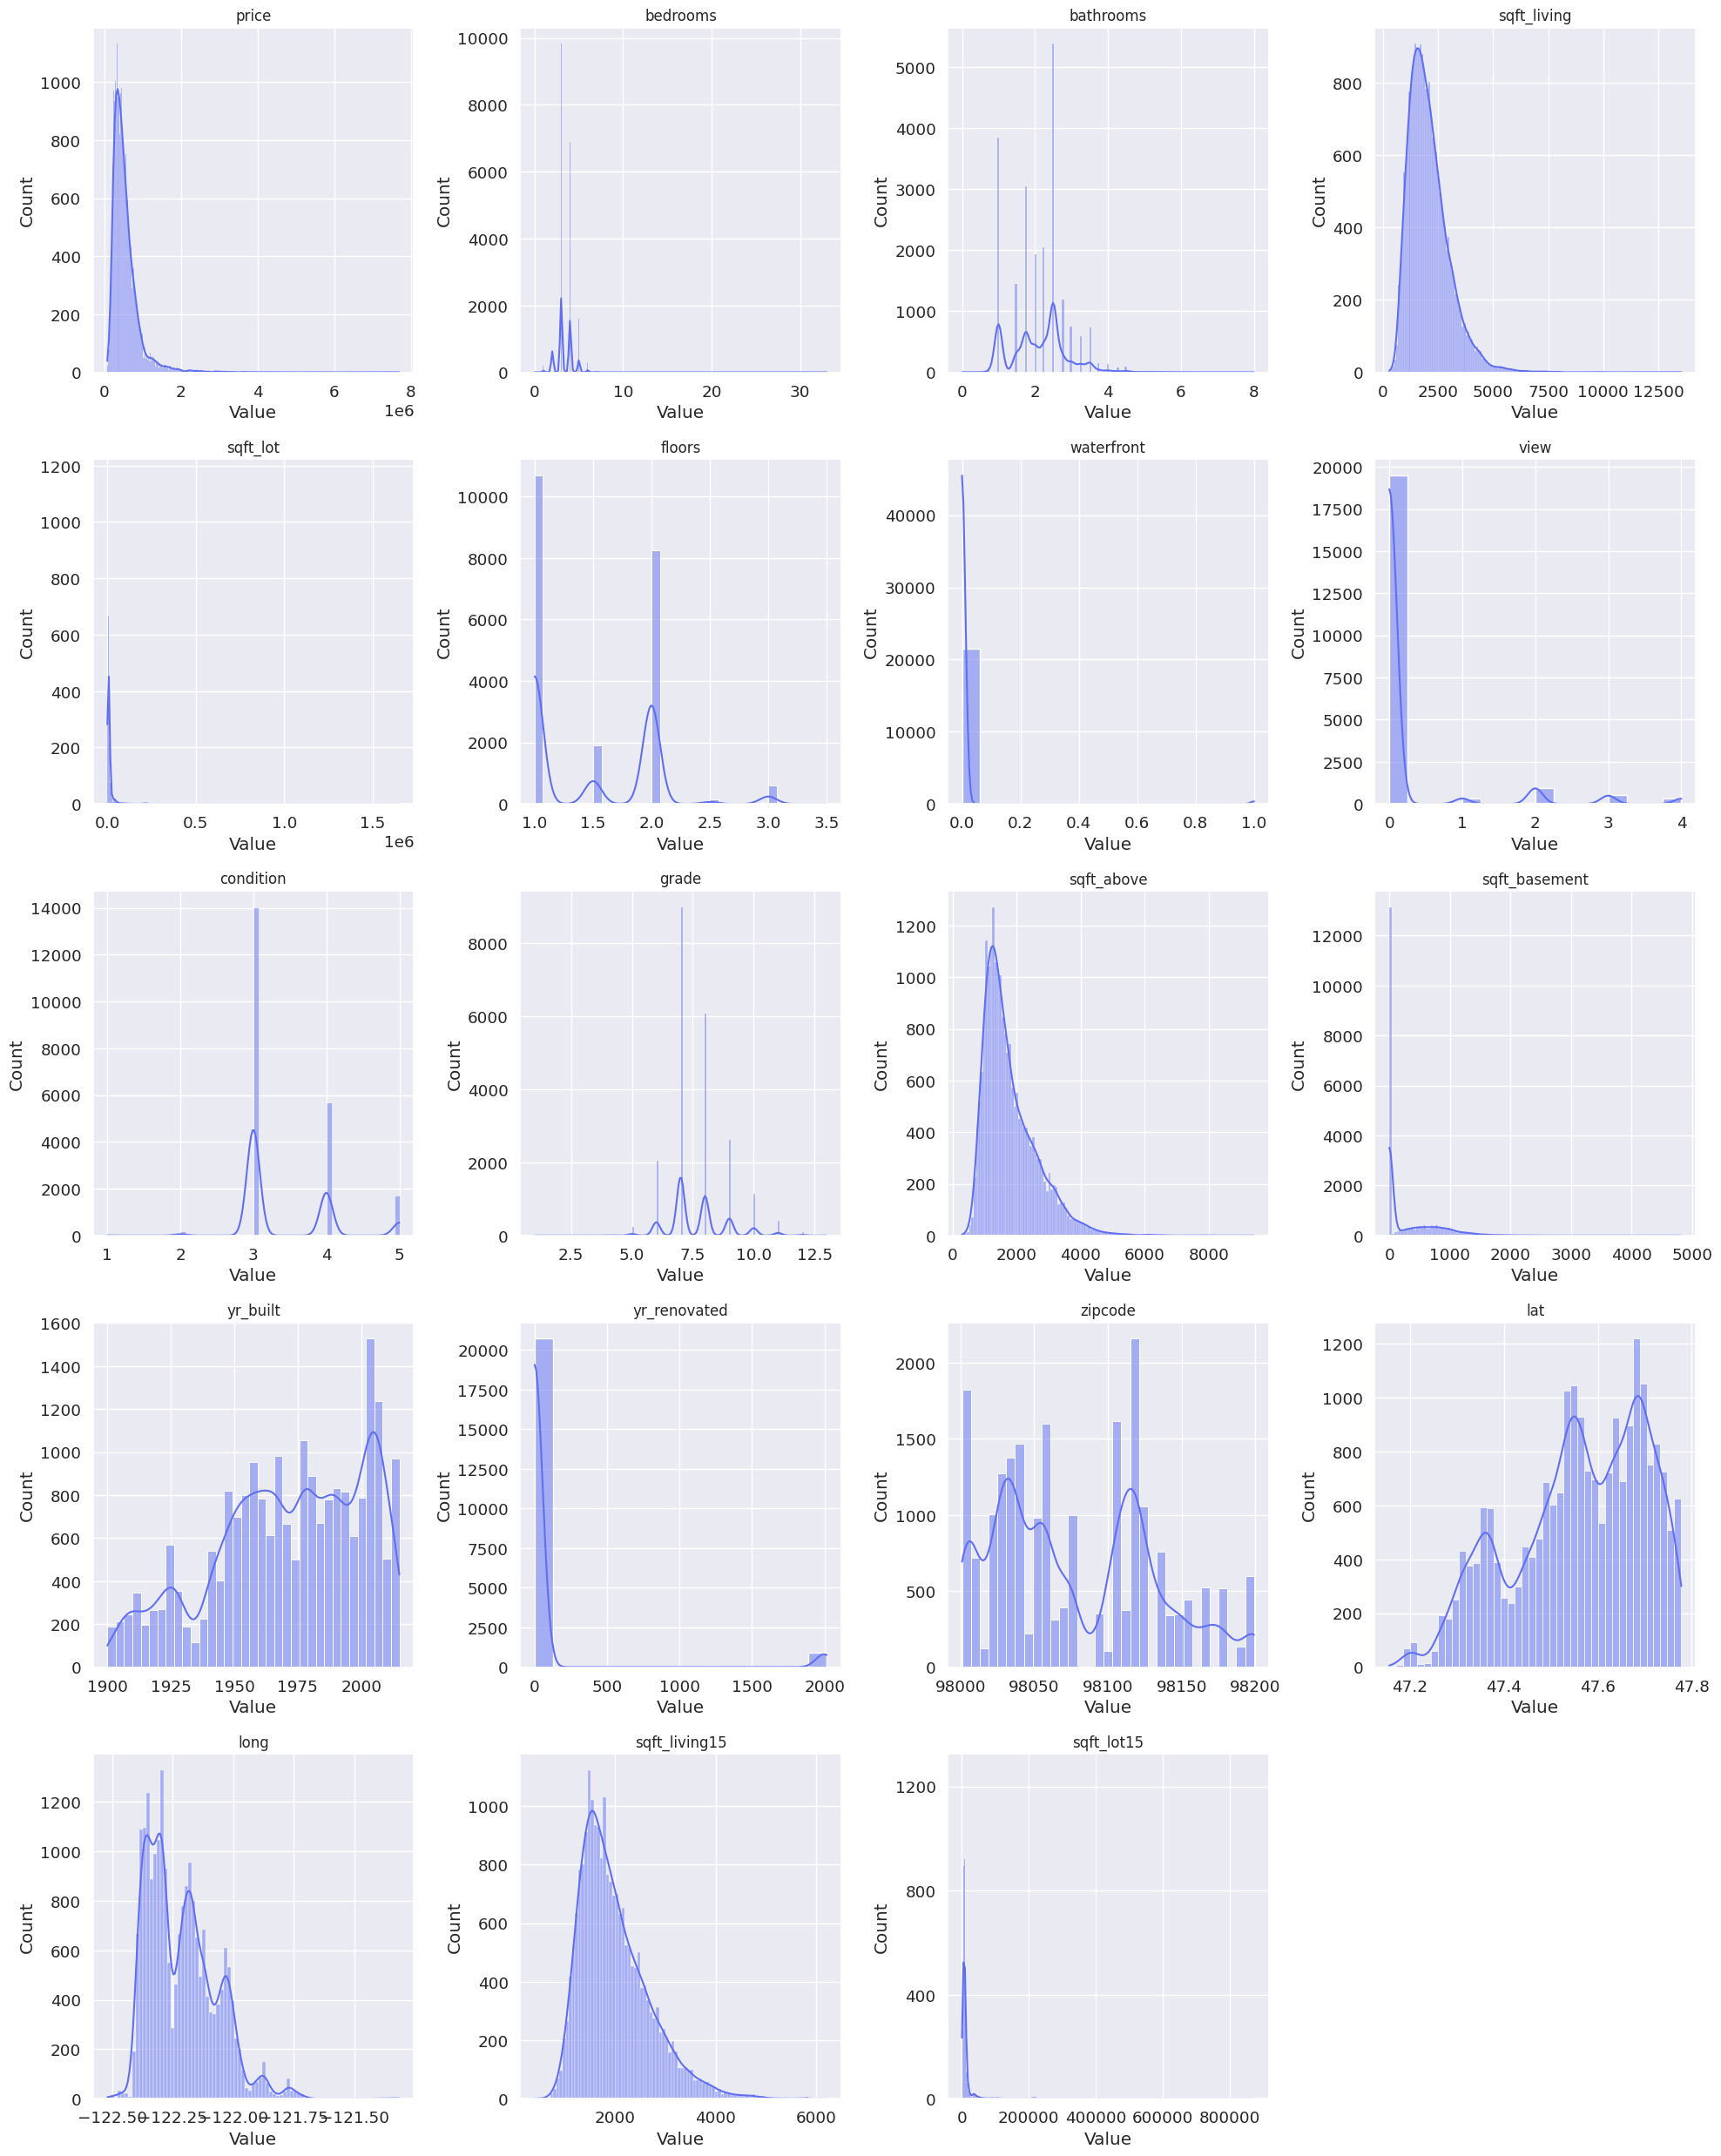

In [15]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Set up the grid of plots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))

# Plot histograms for each numeric variable
for i, col in enumerate(numeric_cols):
    ax = axes[i//4, i%4] # select the correct subplot
    sns.histplot(df[col], ax=ax, kde=True, color='#606ff2')
    ax.set_title(col, fontsize=12)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

# Set xticks
if col == 0:
    xticks = ax.get_xticks()
    ax.set_xticks(xticks[::2])

# Set yticks
yticks = ax.get_yticks()
ax.set_yticks(yticks[::2])

# Delete the last empty axes
fig.delaxes(axes[4,3])

plt.tight_layout()
plt.show()

This data visaulaization is helping us to determine the normal, uniform, exponential or skewed distribution of data for different features.
 
> For example price, sqft_living, sqft_above has positive skews.<br>
> sqft_living15 is having normal distribution

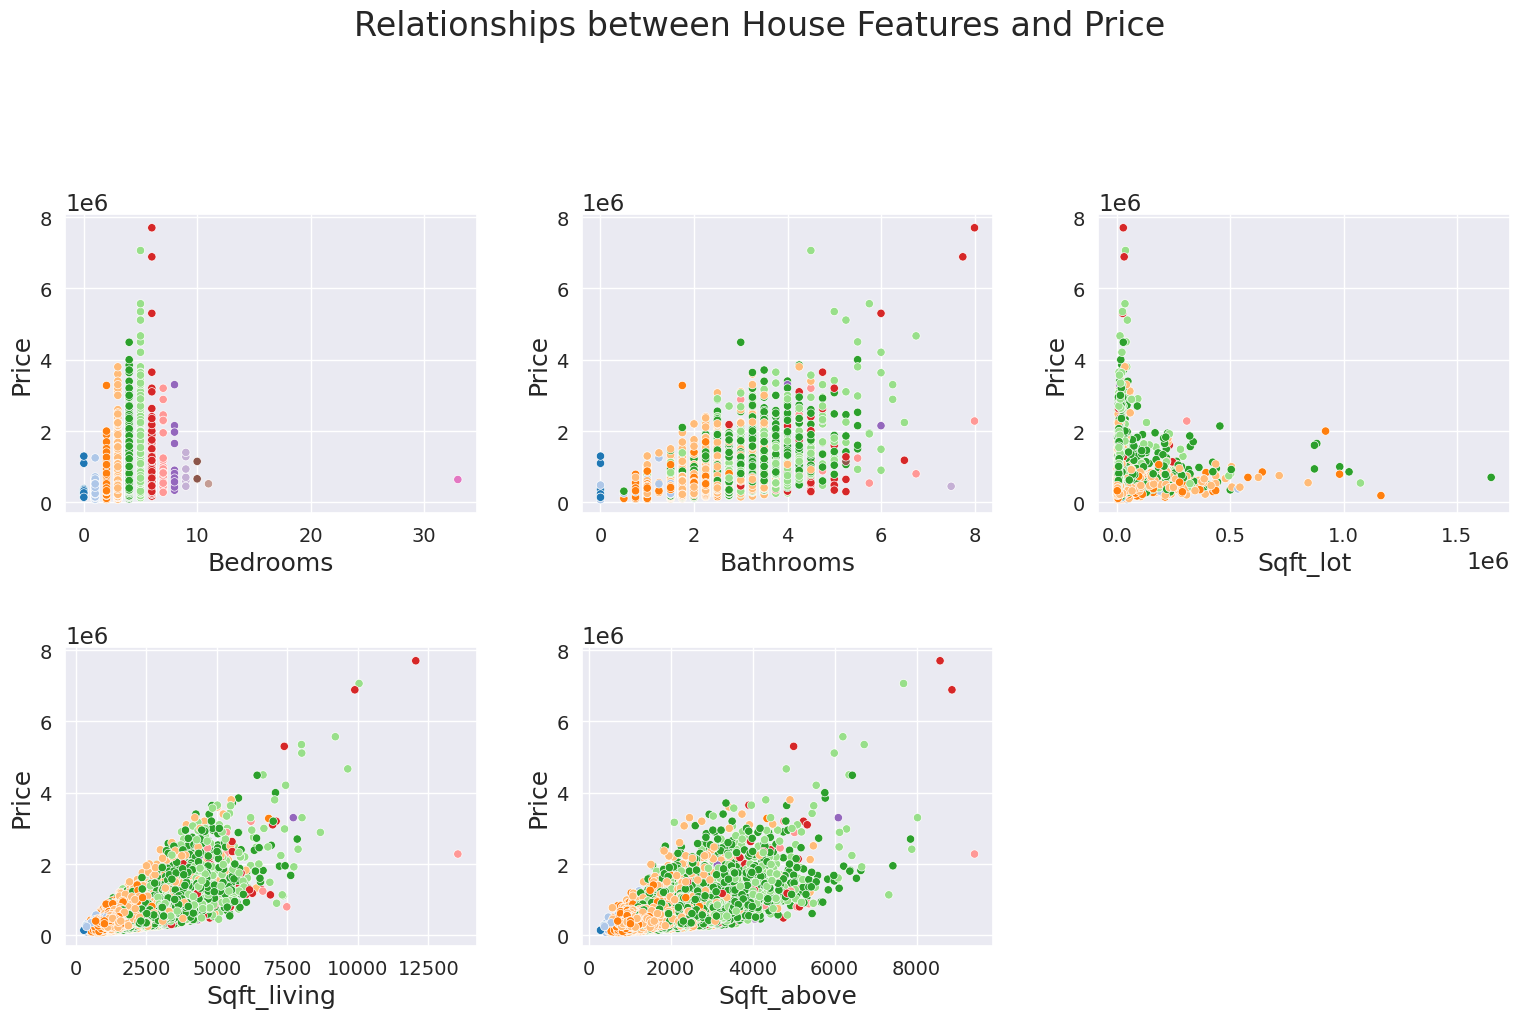

In [16]:
# Set the style and font size
sns.set_style("white")
sns.set(font_scale=1.5)

# Define the features to plot
features = ['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_living', 'sqft_above']

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

# Plot price vs each feature in a separate subplot using a loop
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.scatterplot(x=feature, y='price', data=df, ax=axes[row,col], hue='bedrooms', palette='tab20')
    axes[row,col].set_xlabel(feature.capitalize(), fontsize=18)
    axes[row,col].set_ylabel('Price', fontsize=18)
    axes[row,col].tick_params(axis='both', which='major', labelsize=14)
    axes[row,col].legend().set_visible(False)
    
# Remove the last subplot in the last row
fig.delaxes(axes[1,2])

# Add a title to the overall plot
fig.suptitle('Relationships between House Features and Price', fontsize=24, y=1.05)

# Adjust the layout and spacing
fig.tight_layout(pad=2, h_pad=2)

# Show the plot
plt.show()


We can see linear relationship forming between **price vs sqft_above** , **price vs sqft_living**<br>

Also I was expecting a linear relationship between price and bedroom which is totally not the case here. The reason could be the presence of outlier like 33 bedrooms.


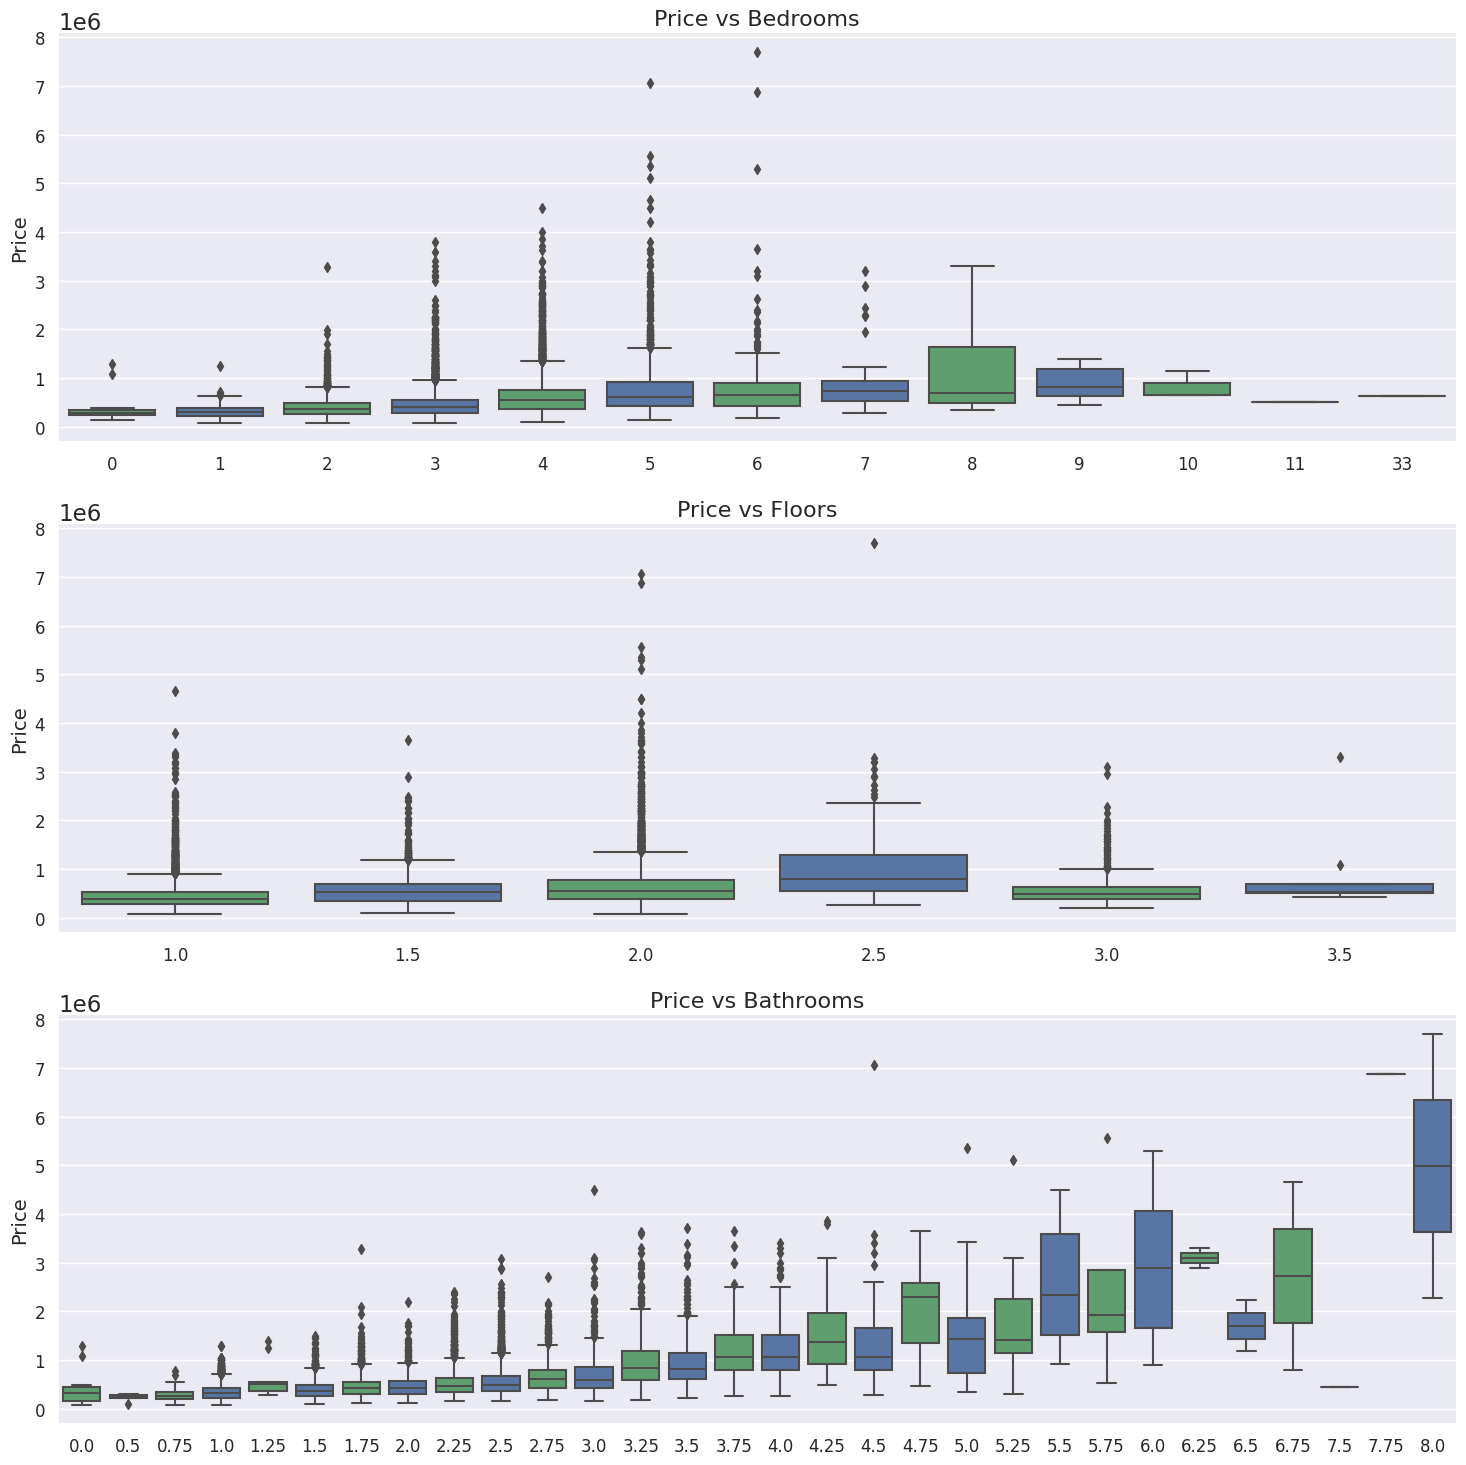

In [17]:
# Create subplots with 3 rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Set color palette
palette = ['#55a868', '#4c72b0']

# Plot boxplots for bedrooms vs price
sns.boxplot(x='bedrooms', y='price', data=df, ax=axes[0], palette=palette)
axes[0].set_title('Price vs Bedrooms', fontsize=16)
axes[0].set_xlabel('Bedrooms', fontsize=14)
axes[0].set_ylabel('Price', fontsize=14)

# Plot boxplots for floors vs price
sns.boxplot(x='floors', y='price', data=df, ax=axes[1], palette=palette)
axes[1].set_title('Price vs Floors', fontsize=16)
axes[1].set_xlabel('Floors', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)

# Plot boxplots for bathrooms/bedrooms vs price
sns.boxplot(x='bathrooms', y='price', data=df, ax=axes[2], palette=palette)
axes[2].set_title('Price vs Bathrooms', fontsize=16)
axes[2].set_xlabel('Bathrooms', fontsize=14)
axes[2].set_ylabel('Price', fontsize=14)

# Remove the extra x-label
for ax in axes:
    ax.set_xlabel('')
    
# Remove top and right spines
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
# Increase tick label font size
for ax in axes:
    ax.tick_params(axis='both', labelsize=12)

# Display the plot
plt.tight_layout()
plt.show()


> Price Vs Bedrooms<br>
* 6 bedroom house has highest price aroound $7M. Can act as outlier.<br>

> Price Vs Floors<br>
* 2.5 Floors house outliers!<br>




In [35]:
# Create a 3D scatter plot of floors, bedrooms, and bathrooms/bedrooms vs price
fig1 = px.scatter_3d(df, x='floors', y='bedrooms', z='bathrooms', color='price', color_continuous_scale='viridis')
fig1.update_layout(scene=dict(xaxis_title='Floors', yaxis_title='Bedrooms', zaxis_title='Bathrooms'))
fig1.write_html("price_vs_fbb.html")
fig1.show()

# Create a 3D scatter plot of floors, bedrooms, and sqft living vs price
fig2 = px.scatter_3d(df, x='floors', y='bedrooms', z='sqft_living', color='price', color_continuous_scale='viridis')
fig2.update_layout(scene=dict(xaxis_title='Floors', yaxis_title='Bedrooms', zaxis_title='Living room (sq ft)'))
fig2.write_html("price_vs_fbs.html")
fig2.show()

# Create a 3D scatter plot of sqft living, sqft lot, and bathrooms vs price
fig3 = px.scatter_3d(df, x='sqft_living', y='sqft_lot', z='bathrooms', color='price', color_continuous_scale='viridis')
fig3.update_layout(scene=dict(xaxis_title='Living room (sq ft)', yaxis_title='Land space (sq ft)', zaxis_title='Bathrooms'))
fig3.write_html("price_vs_ssb.html")
fig3.show()

# Create a 3D scatter plot of sqft living, sqft lot, and bedrooms vs price
fig4 = px.scatter_3d(df, x='sqft_living', y='sqft_lot', z='bedrooms', color='price', color_continuous_scale='viridis')
fig4.update_layout(scene=dict(xaxis_title='Living room (sq ft)', yaxis_title='Land space (sq ft)', zaxis_title='Bedrooms'))
fig4.write_html("price_vs_ssbe.html")
fig4.show()



* **33 bedroom** house has only **1.75 bathrooms**
* We have houses with **0 bath 0 bedroom** with price \$1,095,000, \$380,000.
* Price increases with increse in bathroom number but we can't say the same for bedroom because of outliers.
* Price increases with increase in **Living room (sq ft)**
* **33 Bedroom** house has **Living room (sq ft) - 1620**
* A house with **Land space (sq ft) - 1.6M** has **1 bathroom** and **Living room (sq ft) - 1600**

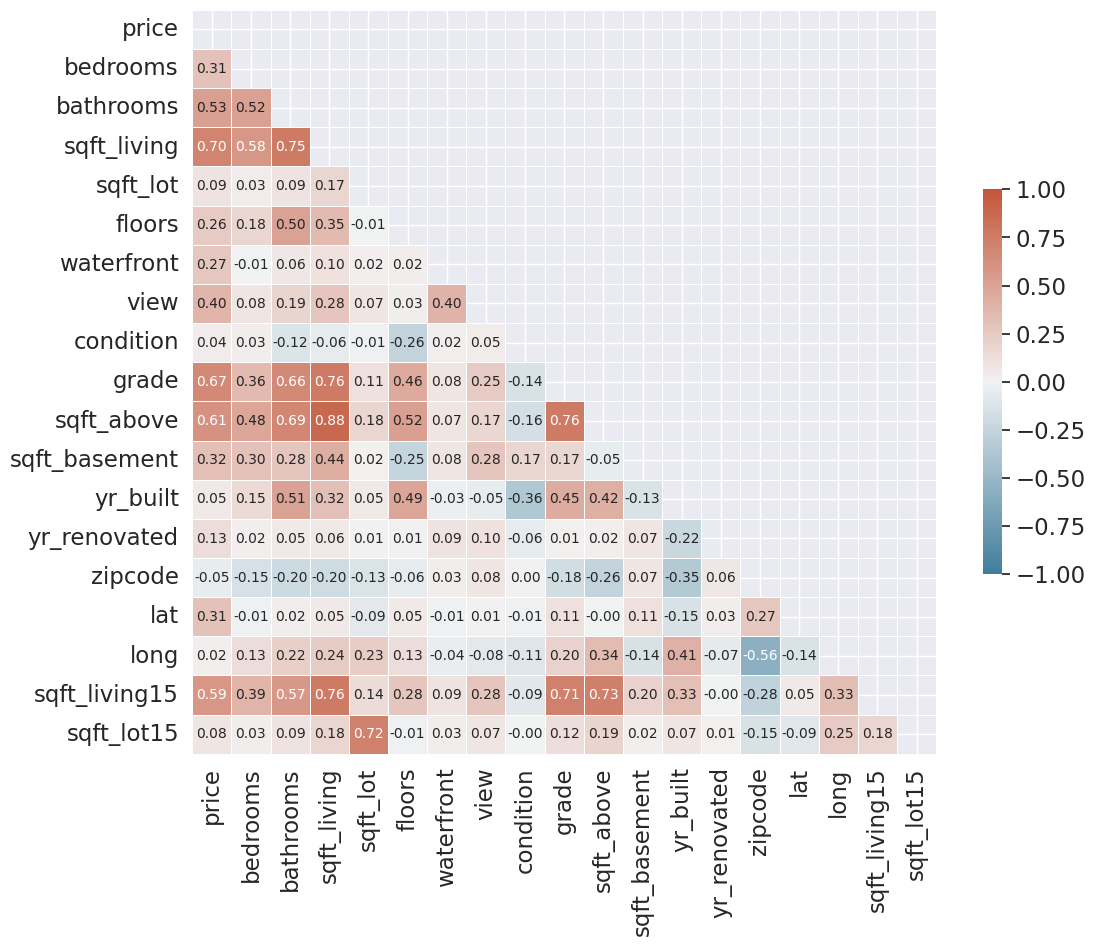

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Create a mask to only show the upper triangle of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot the correlation matrix
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot_kws={"fontsize":10})

# Rotate x-axis labels
#plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()


> High Correlation<br>
* sqft_living vs grade
* yr_built vs floors
* price vs grade
* price vs sqft_above
* price vs sqft_living





In [ ]:
# Create a 3D scatter plot of grade, view, and yr_built vs price
fig1 = px.scatter_3d(df, x='view', y='yr_built', z='grade', color='price', color_continuous_scale='viridis')
fig1.update_layout(scene=dict(xaxis_title='view', yaxis_title='year built', zaxis_title='grade'))
fig1.write_html("price_vs_gvy.html")
fig1.show()

Newly built Houses has better views and grade. The price is increasing with time

In [ ]:
# Create a map centered on Seattle
seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=9)

# Plot the heatmap on top of the map
heatmap_data = df[['lat', 'long', 'price']].values.tolist()
HeatMap(heatmap_data, name='Price Heatmap', min_opacity=0.2).add_to(seattle_map)

# Display the map

seattle_map.save("seattle_map.html")
seattle_map

> Prices are higher in the waterfront side

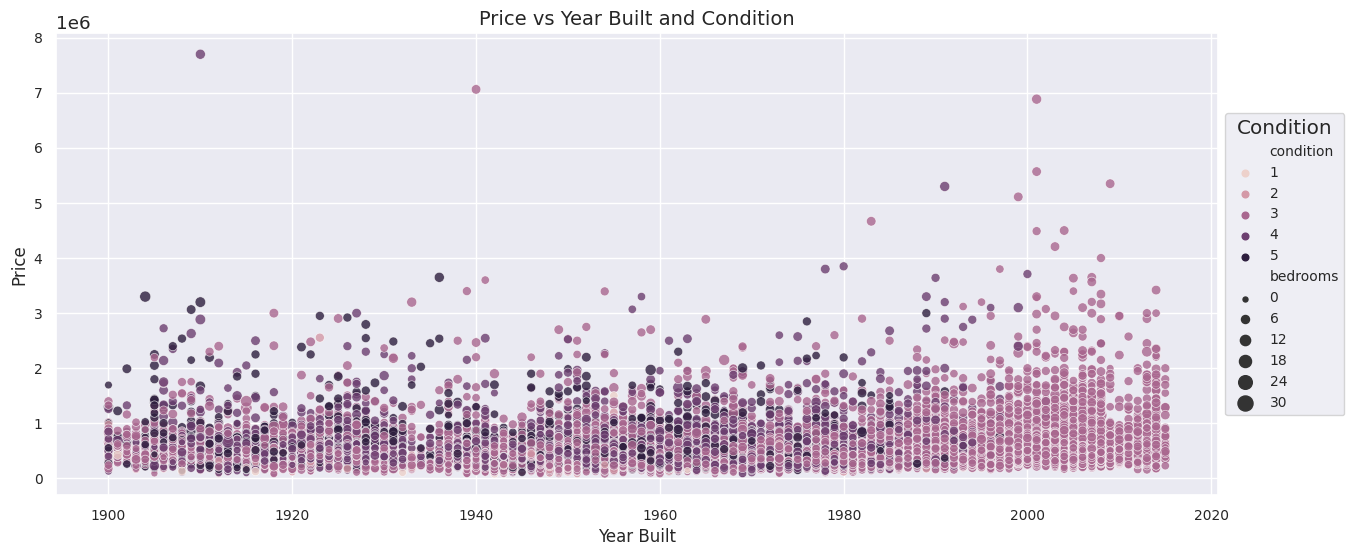

In [31]:
fig, ax = plt.subplots(figsize=(15,6))

sns.scatterplot(data=df, x='yr_built', y='price', hue='condition', size='bedrooms', sizes=(20,200), alpha=0.8, ax=ax)
ax.set_title('Price vs Year Built and Condition', fontsize=14)
ax.set_xlabel('Year Built', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.tick_params(axis='both', labelsize=10)
ax.legend(title='Condition', fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5), markerscale=0.8)
plt.show()

Condition of new house is in range of 2 to 3.5

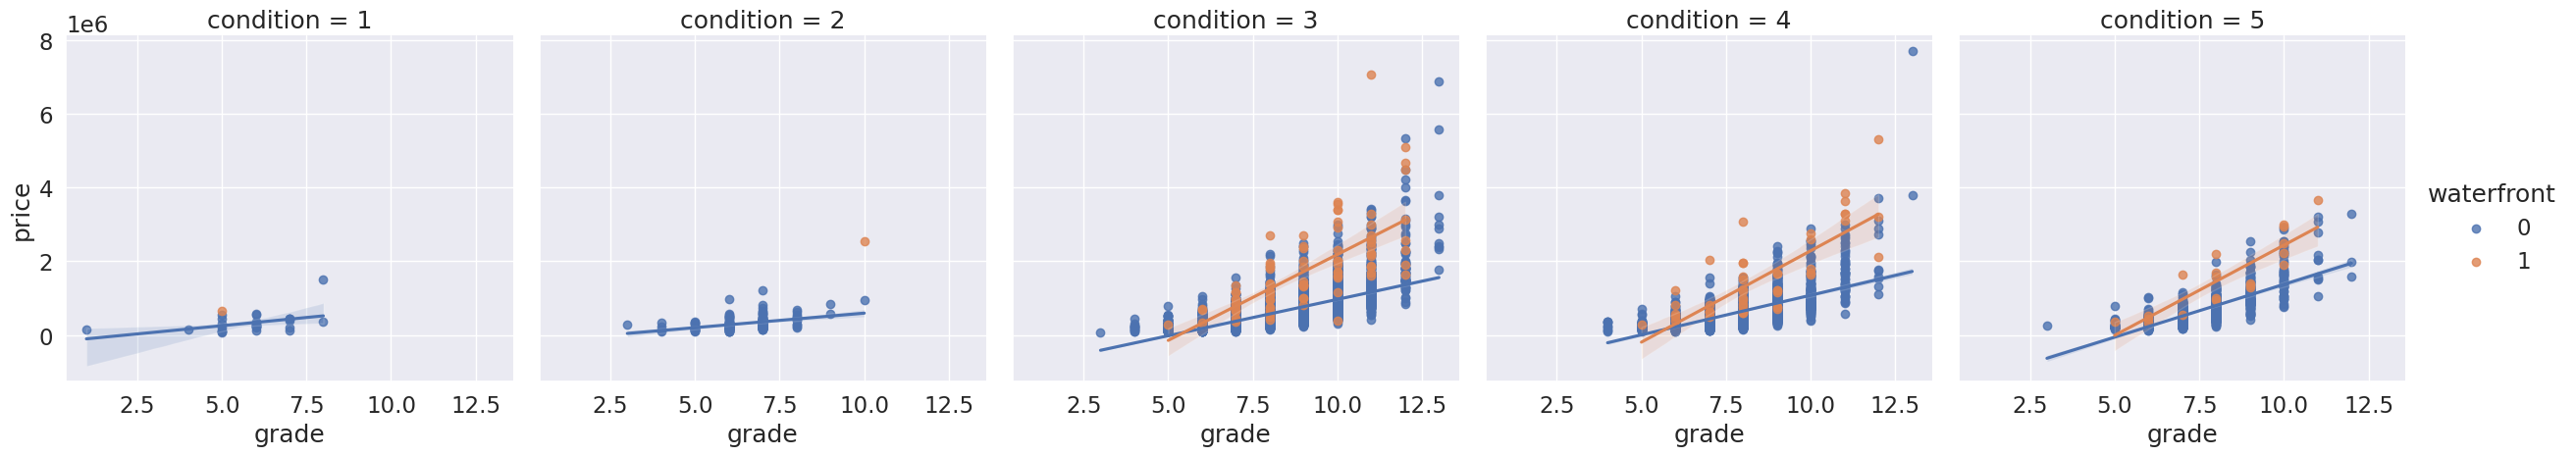

In [ ]:
# Subset the dataframe for only relevant columns
df_sub = df[['price', 'waterfront', 'condition', 'grade']]

# Create the plot using seaborn's lmplot
sns.lmplot(x='grade', y='price', hue='waterfront', col='condition', data=df_sub)
plt.show()

> Takeaway
* Prices rise with grade and condition
* Persence of waterfront also increases the price
* significant increase in price moving from condtion [1,2] -> [3, 4, 5]

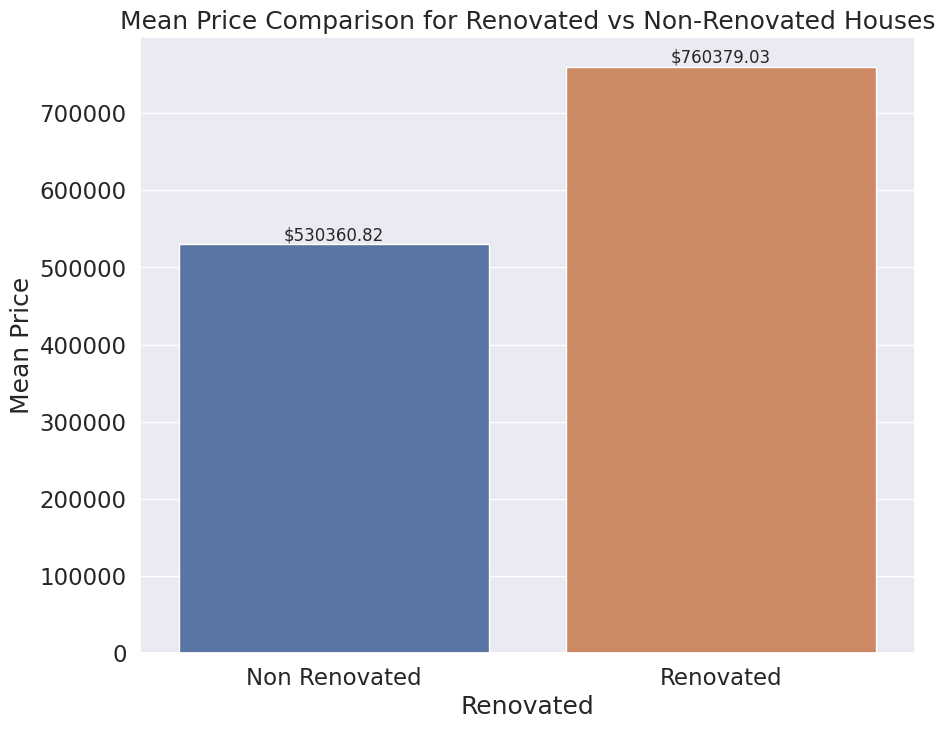

In [ ]:

# Create a new column to indicate if the house is renovated or not
df['renovated'] = df['yr_renovated'].apply(lambda x: 'Renovated' if x > 0 else 'Non Renovated')

# Calculate the mean price for each category
grouped_df = df.groupby('renovated').mean()['price'].reset_index()

# Set the style and font size
sns.set_style("whitegrid")
sns.set(font_scale=1.5)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data
sns.barplot(x='renovated', y='price', data=grouped_df, ax=ax, errorbar=None)

# Add value annotation for mean price
for i in range(grouped_df.shape[0]):
    ax.text(i, grouped_df.loc[i, 'price'], f'${grouped_df.loc[i, "price"]:.2f}', ha='center', va='bottom', fontsize=12)

# Add labels and title
ax.set_xlabel('Renovated')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Price Comparison for Renovated vs Non-Renovated Houses')

# Show the plot
plt.show()


> Avg Price of renovated house is greater than non renovated house

<ipython-input-71-42df4e7975e2>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



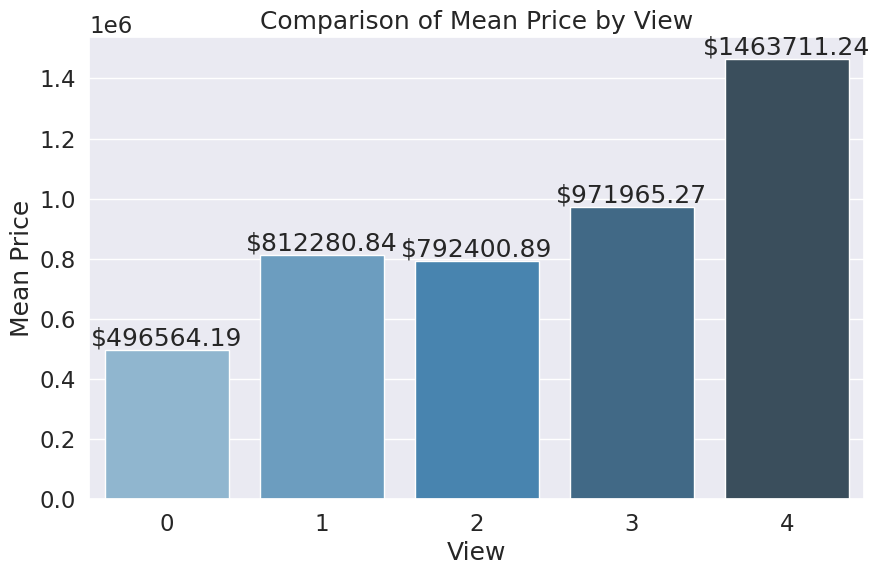

In [ ]:


# Group data by view column and compute mean price
df_grouped = df.groupby('view').mean()['price'].reset_index()

# Create bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='view', y='price', data=df_grouped, palette='Blues_d')

# Add labels and title
plt.xlabel('View')
plt.ylabel('Mean Price')
plt.title('Comparison of Mean Price by View')

# Add value annotation
for index, row in df_grouped.iterrows():
    plt.text(row.name, row.price, f"${row.price:.2f}", ha='center', va='bottom')

# Show plot
plt.show()

> Avg price with view [3,4] is greater than view [0, 1, 2]